# Análisis de Regresión (I)

En este cuaderno, vemos cómo el análisis de regresión puede ayudar a **entender el comportamiento de los datos**, a **predecir valores de datos** (continuos o dicotómicos) y a **encontrar predictores importantes** (modelos dispersos).
Presentamos diferentes modelos de regresión: regresión lineal simple, regresión lineal múltiple y regresión polinómica.
Evaluamos los resultados cualitativamente mediante herramientas de visualización de Seaborn y cuantitativamente mediante la biblioteca Scikit-learn, así como otras cajas de herramientas.

Usamos diferentes conjuntos de datos reales:
* Predicción del precio de un nuevo mercado de viviendas
* Extensión del hielo marino y cambio climático
* Conjunto de datos de diabetes de Scikit-learn
* Conjunto de datos macroeconómicos de EE. UU. de Longley
* Conjunto de datos de publicidad

### Contenidos del cuaderno:

- Regresión
    - Regresión Lineal Simple
    - Regresión Lineal Múltiple
    - Regresión Polinómica
- OLS (Mínimos Cuadrados Ordinarios)
- Evaluación del ajuste (MSE, R^2)
- Predicción (Scikit-learn)
- Visualización (Seaborn lmplot)

## Cómo hacer predicciones sobre cantidades del mundo real.

+ ¿Cómo cambia el volumen de ventas con los cambios en los precios? ¿Cómo se ve afectado por el clima?
+ ¿Cómo varía la cantidad de un medicamento absorbido con el peso corporal del paciente? ¿Depende de la presión arterial?
+ ¿Cuántos clientes puedo esperar hoy?
+ ¿A qué hora debo irme a casa para evitar el atasco?
+ ¿Cuál es la probabilidad de lluvia para los próximos dos lunes? ¿Cuál es la temperatura esperada?

### Ejemplo:
    
<center><img src="files/images/life-expectancy-vs-gdp-per-capita.png"></center>

Puedes encontrar otro ejemplo interesante [aquí](https://ourworldindata.org/grapher/life-expectancy-of-women-vs-life-expectancy-of-women?tab=chart&country=&region=World).

Antes de comenzar, podemos definir algunas configuraciones para el cuaderno:

In [1]:
# Settings for the visualizations
import matplotlib.pylab as plt
%matplotlib inline 
plt.rc('font', size=12) 
plt.rc('figure', figsize = (12, 5))

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})

In [3]:
import numpy as np
import pandas as pd

In [5]:
seed = 12 # Let's make our predictions deterministic

### Notación

$x_i$ elemento de un vector, $\textbf{x}$ vector columna, $\textbf{x'}$ (transpuesta de $\textbf{x}$) vector fila, $X$ matriz.

### De los Datos a los Modelos

Todas estas preguntas tienen una estructura común: preguntamos sobre una variable $\textbf{y}$ (*respuesta*) que puede expresarse como una combinación de una o más variables (independientes) $\textbf{x}_i$ (comúnmente llamadas *covariables* o *predictores* o *regresores*).

El papel de la regresión es construir un modelo (fórmula) para predecir la respuesta a partir de las covariables.

# Modelo de Regresión Lineal

El modelo más simple que podemos pensar es el **modelo lineal**, donde la respuesta $\textbf{y}$ depende linealmente de los predictores $\textbf{x}_i$:

$$ \textbf{y}  =  a_1 \textbf{x}_1  + \dots + a_m \textbf{x}_{m} + \epsilon $$ 

Los $a_i$ se denominan *parámetros* del modelo o *coeficientes* y $\epsilon$ se llama *término de error*, *término de perturbación* o *ruido* (en contraste con la "señal" proporcionada por el resto del modelo). Esta variable captura todos los demás factores que influyen en la variable dependiente $\textbf{y}$ aparte de los predictores $\textbf{x}$. 

Esta ecuación puede reescribirse en una forma más compacta (matricial) como

$$ \textbf{y}  = X \textbf{w} + \epsilon $$

donde $$ \textbf{y} = \left( \begin{array}{c} y_1 \\ y_2 \\ \vdots \\ y_n \end{array} \right), 
 X = \left( \begin{array}{c} x_{11}  \dots x_{1m} \\ x_{21}  \dots x_{2m}\\ \vdots \\ x_{n1}  \dots x_{nm} \end{array} \right),  \textbf{w} = \left( \begin{array}{c} a_1 \\ a_2 \\ \vdots \\ a_m \end{array} \right) 
 \epsilon = \left( \begin{array}{c} \epsilon_1 \\ \epsilon_2 \\ \vdots \\ \epsilon_m \end{array} \right) $$
 
 **La regresión lineal** es la técnica para crear modelos lineales.
 
### Regresión Lineal Simple

En la **regresión lineal simple**, con una sola variable, describimos la relación entre el predictor y la respuesta con una línea recta. 

El modelo es:
$$ \textbf{y}  =  a_0+ a_1 \textbf{x}_1 + \epsilon$$

El parámetro $a_0$ se llama *término constante* o *intercepto*.

En la forma matricial, agregamos un término constante al cambiar a la matriz: $(\textbf{1},X).$

#### Ejemplo: 

¿Depende el precio del seguro de la experiencia al conducir?

Dada la siguiente información, los precios mensuales de seguros de automóviles ($\textbf{y}$) y la experiencia de conducción en años ($\textbf{x}_{1}$) de un conjunto de n=8 sujetos, podemos construir un modelo lineal para responder a esta pregunta.


<center><img src="files/images/data-insurance.png" width="500"></center>


<center><img src="files/images/price-insurance.png" width="500"></center>



También podemos predecir el precio mensual del seguro de automóvil para un conductor con 20 años de experiencia en conducción.

### Interpolación vs. extrapolación

En la práctica, cuando hacemos una predicción para algún valor de x que no hemos visto antes, necesitamos ser muy cuidadosos. Predecir $y$ para un valor de $x$ que está dentro del intervalo de puntos que vimos en los datos originales (los datos con los que ajustamos nuestro modelo) se llama **interpolación**. Predecir y para un valor de x que está fuera del rango de valores que realmente vimos para x en los datos originales se llama **extrapolación**.
Para conjuntos de datos reales, incluso si un ajuste lineal parece apropiado, necesitamos ser extremadamente cuidadosos con la extrapolación, que a menudo puede llevar a predicciones falsas!


<center><img src="files/images/extrapolation.png"  width="500"></center>


### Regresión Múltiple
En la Regresión de Mínimos Cuadrados Ordinarios con una sola variable describimos la relación entre el predictor y la respuesta con una línea recta. Este caso se llama regresión lineal *simple*. 

La regresión lineal simple se puede extender a un mayor número de variables. Teniendo m variables predictoras, ajustaremos un hiperplano m-dimensional a nuestros m predictores.

$$ \textbf{y} = a_1 \textbf{x}_1 + \dots + a_m \textbf{x}_m = X \textbf{w} $$

### Regresión Polinómica

A pesar de su nombre, la regresión lineal se puede usar para ajustar funciones no lineales. Un modelo de regresión lineal es lineal en los parámetros del modelo, no necesariamente en los predictores. Si agregas transformaciones no lineales de tus predictores al modelo de regresión lineal, el modelo será no lineal en los predictores.

$$ \textbf{y} = a_1 \phi(\textbf{x}_1) + \dots + a_m \phi(\textbf{x}_m) $$

Esta técnica de regresión no lineal muy popular es la *Regresión Polinómica*, una técnica que modela la relación entre la respuesta y los predictores como un polinomio de orden n. Cuanto mayor sea el orden del polinomio, más funciones "onduladas" podrás ajustar.

Podemos representar una relación curva entre nuestras variables introduciendo términos **polinómicos**, como por ejemplo, un modelo cúbico:


$$y_i \approx a_0 + a_1 x_i + a_2 x_i^2 + a_3 x_i^3$$



Usar un polinomio de orden superior tiene un precio: **complejidad computacional** y **sobreajuste**. El sobreajuste se refiere a una situación en la que el modelo se ajusta a las idiosincrasias de los datos de entrenamiento y pierde la capacidad de generalizar de lo visto a predecir lo no visto.

Ejemplo:

<center><img src="files/images/overfitting.png" width = '700'></center>

## Estimadores

Generemos un conjunto de datos para ilustrar la regresión lineal simple.

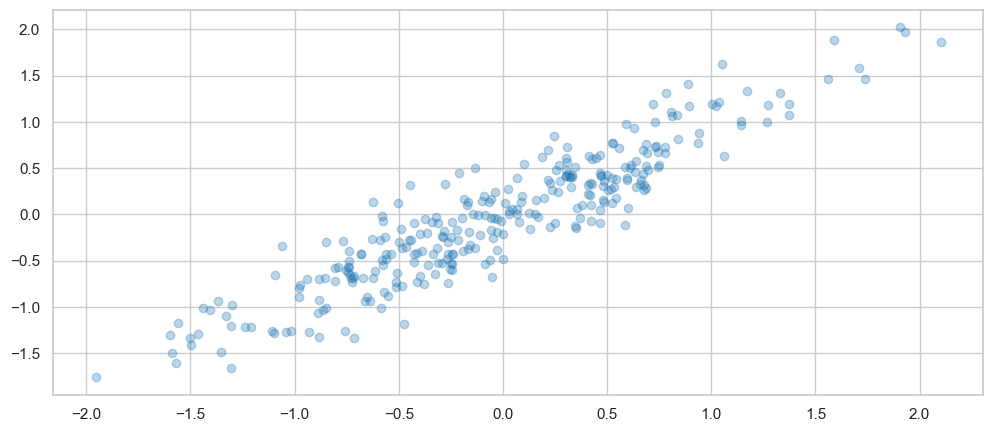

In [7]:
X1 = np.random.randn(300, 2)  # Random floats sampled from a univariate “normal” (Gaussian) distribution
A = np.array([[0.6, .4], [.4, 0.6]]) # Transformation matrix
X2 = np.dot(X1, A)

X = X2[:, 0]
y = X2[:, 1]

plt.plot(X, y, "o", alpha=0.3) # alpha, transparency value, between 0 (transparent) and 1 (opaque).

Podemos crear un modelo lineal para explicar los datos.

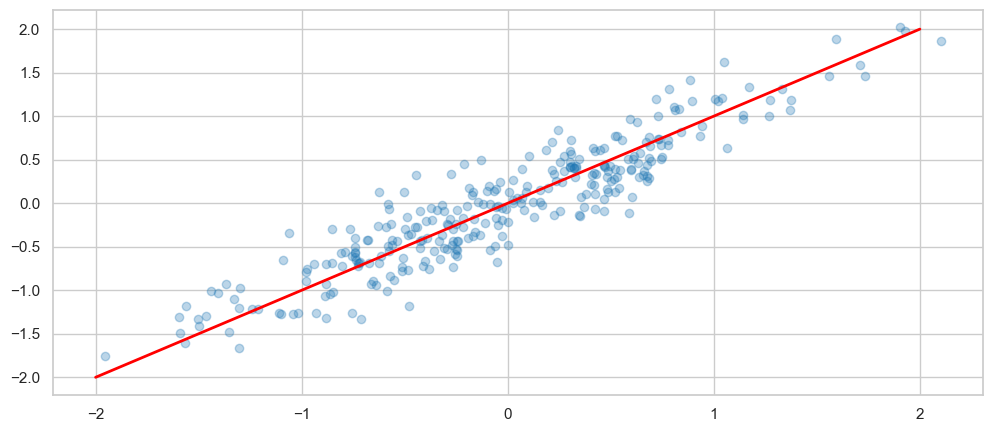

In [9]:
model=[0+1*x for x in np.arange(-2,3)] # np.arange returns evenly spaced values within a given interval.

plt.plot(X, y, "o", alpha=0.3);
plt.plot(np.arange(-2,3), model,'r'); 
plt.show()
# The red line gives the predicted values of this model

Pero hay otros modelos lineales.

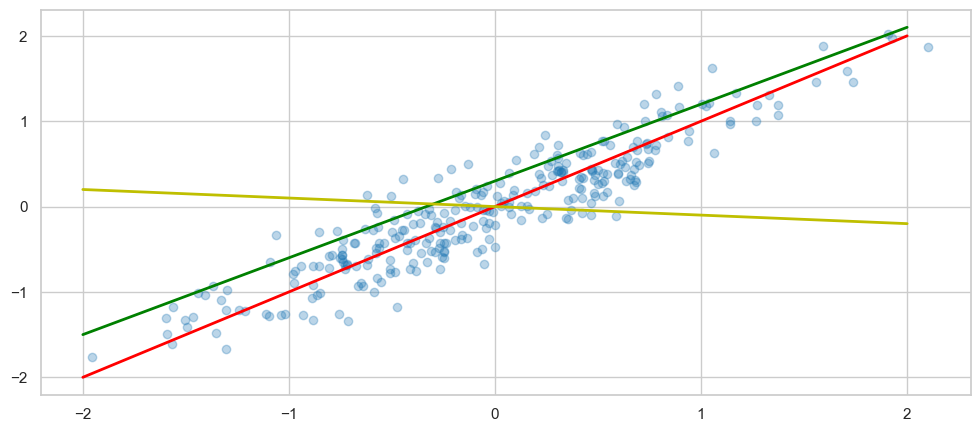

In [11]:
plt.plot(X, y, "o", alpha=0.3);
# We can use several parameters and we do not know which is the best model
model1=[0+1*x for x in np.arange(-2,3)]
model2=[0.3+0.9*x for x in np.arange(-2,3)]
model3=[0-0.1*x for x in np.arange(-2,3)]
plt.plot(np.arange(-2,3), model1,'r')
plt.plot(np.arange(-2,3), model2,'g')
plt.plot(np.arange(-2,3), model3,'y')


#### ¿Cuál es el mejor modelo para un conjunto de muestras?

### MCO (Mínimos Cuadrados Ordinarios) -> OLS (por sus siglas en inglés)

Considera el sistema sobredeterminado

$$\textbf{y} = a_0+a_1 \textbf{x} $$

Los Mínimos Cuadrados Ordinarios (MCO) es el **estimador** más simple y común en el cual los dos valores de $a$ se eligen para minimizar la suma de las distancias al cuadrado entre los valores predichos y los valores reales.

Dado el conjunto de muestras $(\textbf{x},\textbf{y})$, el objetivo es minimizar:

$$ ||a_0 + a_1 \textbf{x} -  \textbf{y} ||^2_2 = \sum_{j=1}^n (a_0+a_1 x_{j} -  y_j )^2,$$ con respecto a $a_0, a_1$.

Esta expresión se conoce a menudo como **suma de errores cuadrados de predicción (SSE)**.

#### Cómo calcular el MCO: Scipy.optimize

Optimization terminated successfully.
         Current function value: 21.375000
         Iterations: 79
         Function evaluations: 153


(0.0, 20.0)

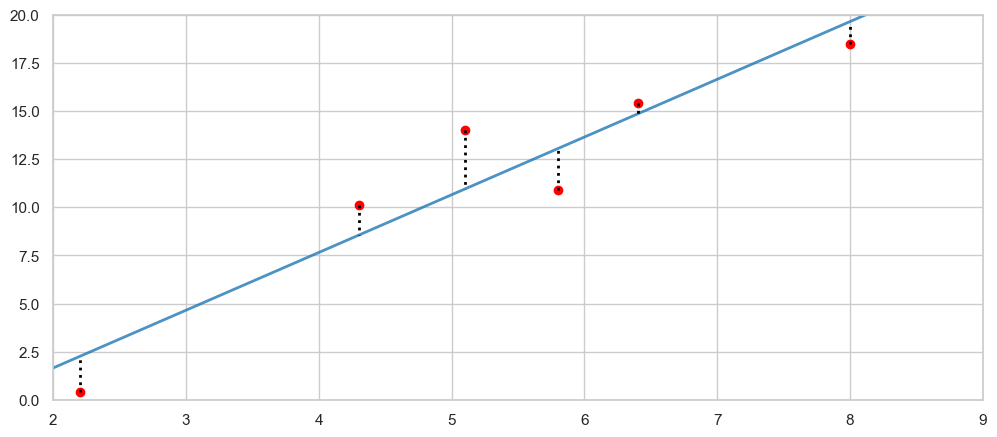

In [13]:
from scipy.optimize import fmin

x = np.array([2.2, 4.3, 5.1, 5.8, 6.4, 8.0])
y = np.array([0.4, 10.1, 14.0, 10.9, 15.4, 18.5])
 
# Minimize the sum of squares using a lambda function

sse = lambda a, x, y: np.sum((a[0] + a[1]*x - y) ** 2) # Store the sum of squared differences function
# Lambda function is a small anonymous function. 
# It can take any number of arguments, but can only have one expression. 
# Syntax "lambda arguments : expression"

a0,a1 = fmin(sse, [0,1], args=(x,y)); # Minimize the sum of squared differences
# [0,1] is the initial guess for a[0] and a[1] in function sse.

plt.plot(x, y, 'ro')
plt.plot([0,10], [a0, a0+a1*10], alpha=0.8) # Add the regression line, colored in blue
for xi, yi in zip(x,y):
    plt.plot([xi]*2, [yi, a0+a1*xi], "k:") # Add pointed black line to illustrate the errors
plt.xlim(2, 9); plt.ylim(0, 20) # Restrict the domain

Las líneas negras señaladas ilustran los errores verticales que se minimizan.

**Nota**: Existen alternativas a los modelos de regresión con errores en las variables como los **mínimos cuadrados totales**.

### Otros estimadores

Podemos minimizar otros criterios, como la suma de las diferencias absolutas entre los valores predichos y los valores reales (**suma de errores absolutos (SAE)**).

$$  \sum_{j=1}^n |a_0+a_1 x_{j} -  y_j|,$$ con respecto a $a_0, a_1$.

**Pregunta**
Intenta ajustar un modelo lineal minimizando el SAE y haz el mismo gráfico para visualizar los resultados. ¿Qué diferencias observas?

Optimization terminated successfully.
         Current function value: 10.162463
         Iterations: 39
         Function evaluations: 77


(0.0, 20.0)

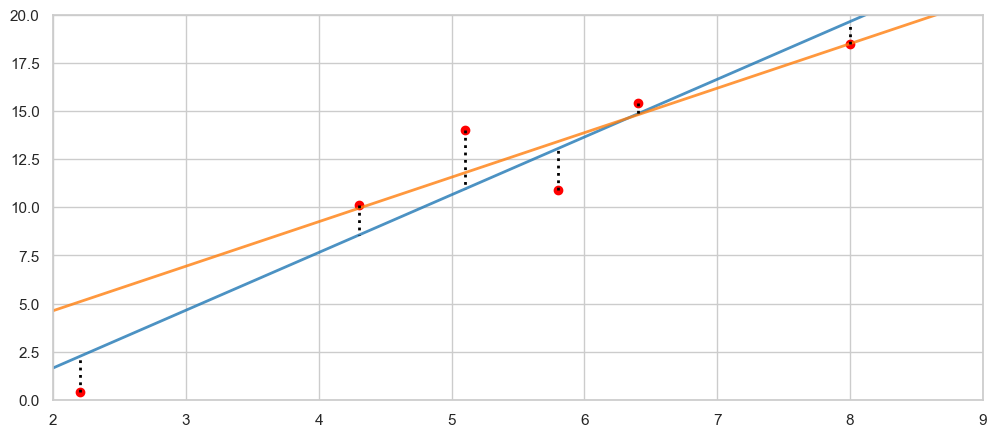

In [15]:
# Your code goes here

from scipy.optimize import fmin

x = np.array([2.2, 4.3, 5.1, 5.8, 6.4, 8.0])
y = np.array([0.4, 10.1, 14.0, 10.9, 15.4, 18.5])
 
# Minimize the sum of squares using a lambda function

sse = lambda a, x, y: np.sum((a[0] + a[1]*x - y) ** 2) # Store the sum of squared differences function
sae = lambda a, x, y: np.sum(abs(a[0] + a[1]*x - y))
# Lambda function is a small anonymous function. 
# It can take any number of arguments, but can only have one expression. 
# Syntax "lambda arguments : expression"

b0,b1 = fmin(sae, [0,1], args=(x,y)); # Minimize the sum of squared differences
# [0,1] is the initial guess for b[0] and b[1] in function sse.

plt.plot(x, y, 'ro')
plt.plot([0,10], [a0, a0+a1*10], alpha=0.8) # Add the regression line, colored in blue
plt.plot([0,10], [b0, b0+b1*10], alpha=0.8) # Add the regression line, colored in orange
for xi, yi in zip(x,y):
    plt.plot([xi]*2, [yi, a0+a1*xi], "k:") # Add pointed black line to illustrate the errors
plt.xlim(2, 9); plt.ylim(0, 20) # Restrict the domain



Como puedes ver, en este caso, los valores lejanos son menos penalizados.

**OLS es un enfoque popular por varias razones**

+ Es computacionalmente económico calcular los coeficientes.
+ Es más fácil de interpretar que modelos más sofisticados. En situaciones donde el objetivo es entender un modelo simple en detalle, en lugar de estimar la respuesta con precisión, pueden proporcionar una visión de lo que el modelo captura.
+ Finalmente, en situaciones donde hay mucho ruido, puede ser difícil encontrar la forma funcional verdadera, por lo que un modelo restringido puede funcionar bastante bien en comparación con un modelo complejo que es más afectado por el ruido.

El modelo resultante se representa de la siguiente manera:

$$\widehat{\textbf{y}} = \widehat{a}_0+\widehat{a}_1 \textbf{x}$$

Aquí, los sombreros sobre las variables indican que se estiman a partir de los datos que tenemos disponibles.

# Implementación en Python con Scikit-learn

### División de Entrenamiento y Prueba

Uno de los aspectos clave del aprendizaje automático supervisado es la evaluación y validación del modelo. Cuando evalúas el rendimiento predictivo de tu modelo, es esencial que el proceso sea imparcial.

No puedes evaluar el rendimiento predictivo de un modelo con los mismos datos que usaste para entrenar. Necesitas evaluar el modelo con datos nuevos que no hayan sido vistos por el modelo antes. Puedes lograrlo dividiendo tu conjunto de datos antes de usarlo.

Usando train_test_split() de la biblioteca de ciencia de datos scikit-learn, puedes dividir tu conjunto de datos en subconjuntos que minimicen el potencial de sesgo en tu proceso de evaluación y validación.

#### Implementación de la división de entrenamiento y prueba

In [17]:
# Create some dummy data
X1 = np.random.randn(12, 2)  # Random floats sampled from a univariate “normal” (Gaussian) distribution
A = np.array([[0.6, .4], [.4, 0.6]]) # Transformation matrix
X2 = np.dot(X1, A)

X = X2[:, 0].reshape(-1,1) # X needs to be a 2D array as the input format for the model
y = X2[:, 1]

print('Size of X and y: {} {}'.format(X.shape, y.shape))
print(X)
print(y)

Size of X and y: (12, 1) (12,)
[[ 0.90300063]
 [ 1.0769644 ]
 [ 0.36270638]
 [-1.03461706]
 [ 0.15747285]
 [ 0.62391917]
 [-0.60949416]
 [-0.57179553]
 [-1.62269454]
 [ 0.54886667]
 [ 0.17351372]
 [ 0.87683681]]
[ 0.77923496  0.59325545  0.26491494 -1.34547827  0.35954343  0.8048197
 -1.0172932  -0.29764615 -1.76193113  0.50286853 -0.5108729   1.2518042 ]


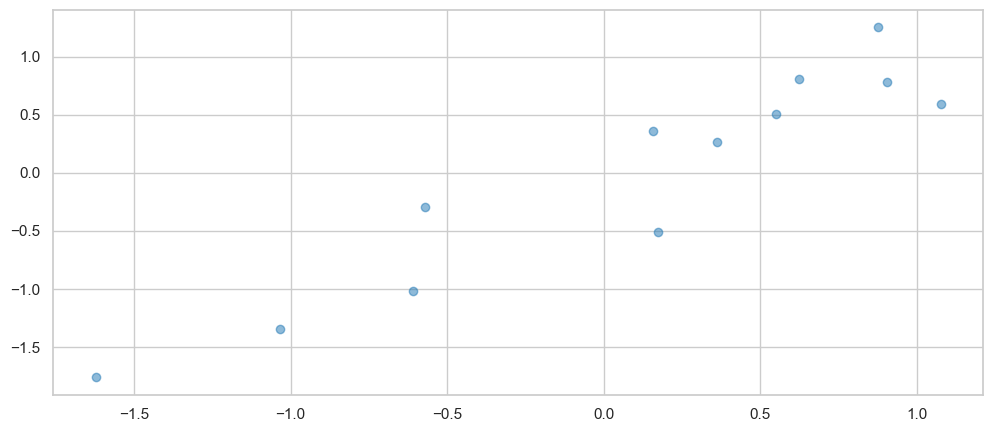

In [19]:
# Visualize our data
plt.plot(X, y, "o", alpha=0.5) # alpha, transparency value, between 0 (transparent) and 1 (opaque).
plt.show()

**Para completar**
Divide en conjuntos de entrenamiento y prueba y verifica los tamaños.

In [21]:
from sklearn.model_selection import train_test_split

# Split in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=seed)

# Check train and test sizes
print(X.shape, X_train.shape, X_test.shape)
print(y.shape, y_train.shape, y_test.shape)

(12, 1) (9, 1) (3, 1)
(12,) (9,) (3,)


## Predicción

Hagamos predicciones usando **Scikit-learn**.

Scikit-learn es una biblioteca que ofrece una variedad de técnicas de aprendizaje automático supervisadas y no supervisadas. Scikit-learn proporciona una interfaz orientada a objetos centrada en el concepto de un Estimador.

El método <code>Estimator.fit</code> establece el estado del estimador basado en los *datos de entrenamiento*. Por lo general, los datos están compuestos por un arreglo de numpy bidimensional $X$ de forma <code>(n_samples, n_predictors)</code> que contiene la llamada *matriz de características* y un arreglo de numpy unidimensional $\textbf{y}$ que contiene las *respuestas*. Algunos estimadores permiten al usuario controlar el comportamiento de ajuste.
Los estimadores que pueden generar predicciones proporcionan un método ``Estimator.predict``.
En el caso de la regresión, ``Estimator.predict`` devolverá los valores de regresión predichos, $\widehat{\textbf{y}}$.

Durante el proceso de ajuste, el estado del estimador se almacena en los atributos de instancia que tienen un guion bajo al final (``'_'``). Por ejemplo, los coeficientes de un estimador de ``LinearRegression`` se almacenan en el atributo ``coef_``. Veamos un ejemplo práctico:

**Para completar**
Crea el estimador de Regresión Lineal y realiza el ajuste

In [53]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

# Create the Linear Regression estimator
lm = LinearRegression()

# Perform the fitting
lm.fit(X_train, y_train)

# Print coefs
print(lm.intercept_, lm.coef_)

-0.05942919802795799 [1.2576767]


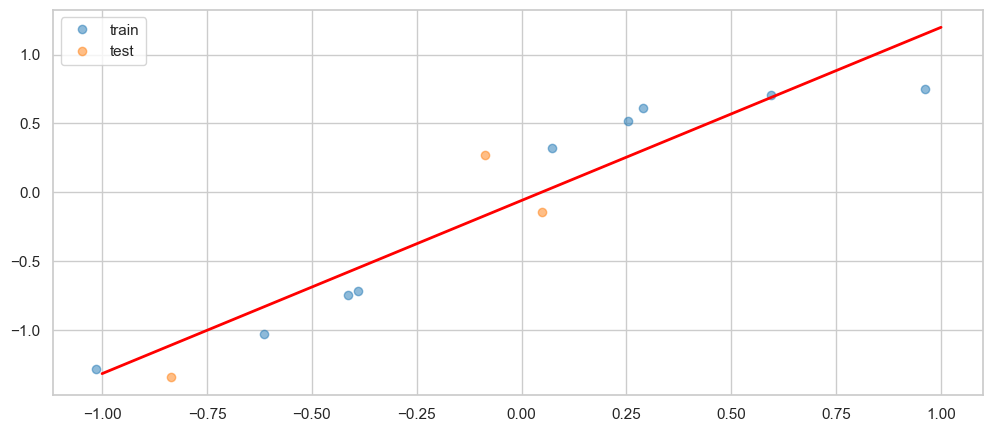

In [55]:
# Define xmin xmax for the model:
xmin, xmax = round(X.min()), round(X.max())

x_model = np.arange(xmin, xmax+1)
y_model=[lm.intercept_+lm.coef_*x for x in x_model] # np.arange returns evenly spaced values within a given interval.

plt.plot(X_train, y_train, "o", alpha=0.5, label="train") # alpha, transparency value, between 0 (transparent) and 1 (opaque).
plt.plot(X_test, y_test, "o", alpha=0.5, label="test") # alpha, transparency value, between 0 (transparent) and 1 (opaque).
plt.plot(x_model, y_model,'r'); 

plt.legend()
plt.show()
# The red line gives the predicted values of this model

## Ejemplo 1: Datos de Vivienda 


In [85]:
#from sklearn import datasets
#boston = datasets.load_boston() # Dictionary-like object that exposes its keys as attributes.
#X_boston,y_boston = data, target # Create X matrix and y vector from the dataset.
#print('Shape of data: {} {}'.format(X_boston.shape, y_boston.shape))

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [91]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
X_housing,y_housing = housing.data, housing.target # Create X matrix and y vector from the dataset.
print('Shape of data: {} {}'.format(X_housing.shape, y_housing.shape))

Shape of data: (20640, 8) (20640,)


In [208]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

El conjunto de datos de Boston tiene 506 instancias y 13 atributos.
Veamos el contenido del conjunto de datos, que son las claves de los atributos o características y la descripción general:

In [93]:
print('keys: {}'.format(housing.keys()))
print('feature names: {}'.format(housing.feature_names))
#print(boston.DESCR)

keys: dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [95]:
# Create a DataFrame from the Boston dataset
df_boston = pd.DataFrame(housing.data, columns=housing.feature_names) 
df_boston['PRICE'] = housing.target

In [97]:
df_boston.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [212]:
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   PRICE       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [217]:
df_boston.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Primero consideramos la tarea de predecir los **valores medianos de las casas** en el área de Boston utilizando como predictor uno de los atributos, por ejemplo, **LSTAT**, definido como "la proporción de estatus bajo de la población".

**Para completar**
- Visualiza los datos que queremos ajustar
- Divide tus datos en un conjunto de entrenamiento y otro de prueba
- Ajusta una regresión lineal simple usando la variable LSTAT para predecir el Precio
- ¿Qué tan buena es la regresión?

Primero, visualicemos los datos que queremos ajustar

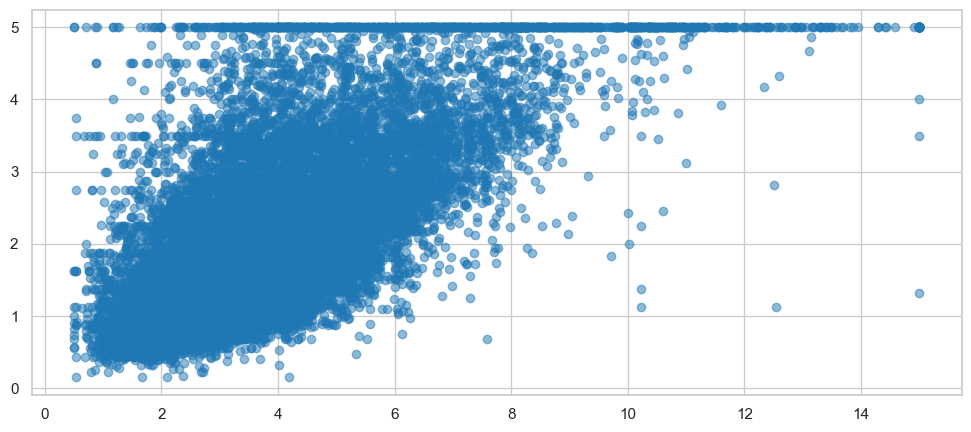

In [111]:
# Your code goes here
X = df_boston.MedInc.values.reshape(-1, 1)
y = df_boston.PRICE.values

plt.plot(X, y, "o", alpha=.5)

Divide tus datos en conjuntos de entrenamiento y prueba.

In [113]:
# Your code goes here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(16512, 1) (4128, 1) (16512,) (4128,)


In [115]:
X_train[:10]

array([[1.1296],
       [5.6613],
       [2.3438],
       [3.9531],
       [2.5489],
       [3.225 ],
       [4.4777],
       [3.4812],
       [3.5179],
       [3.1679]])

In [117]:
y_train[:10]

array([0.938, 1.724, 0.723, 1.786, 2.205, 1.54 , 2.825, 4.328, 1.972,
       1.1  ])

Ajusta una regresión lineal simple: **LSTAT vs Precio**

In [119]:
# Create the Linear Regression estimator
lm = LinearRegression()

# Perform the fitting
lm.fit(X_train, y_train)

# Print coeficient and intercept of the regression
print(lm.intercept_, lm.coef_)

0.45427376163785116 [0.41679811]


Visualicemos los resultados

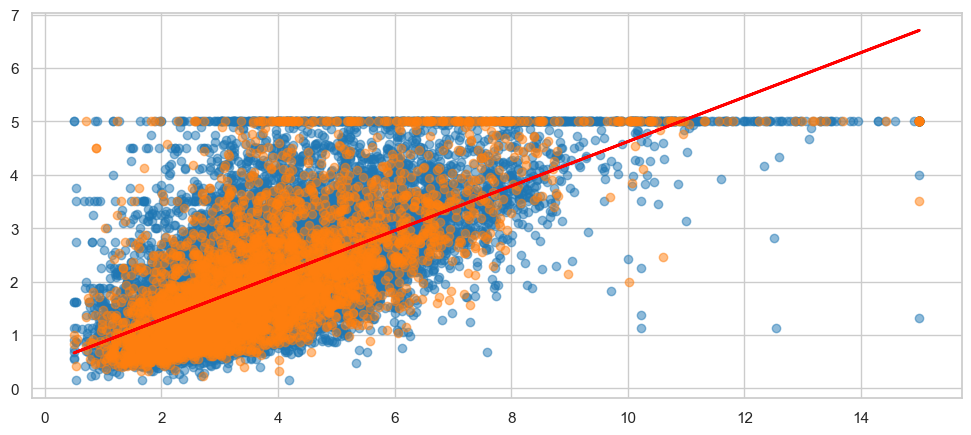

In [121]:
# Your code goes here
y_train_pred = lm.predict(X_train)

plt.plot(X_train, y_train, "o", alpha=.5)
plt.plot(X_test, y_test, "o", alpha=.5)
plt.plot(X_train, y_train_pred, "r")


## Evaluación

Podemos evaluar el ajuste del modelo calculando el error cuadrático medio ($MSE$) y el coeficiente de determinación ($R^2$) del modelo.

El coeficiente $R^2$ se define como:
$$R^2 = (1 - \textbf{u}/\textbf{v})$$
donde $\textbf{u}$ es la suma residual de cuadrados: $$\textbf{u}=\sum (\textbf{y} - \widehat{\textbf{y}} )^2$$ donde ${\textbf{y}}$ es la respuesta observada y $\widehat{\textbf{y}}$ es la respuesta predicha.

Y $\textbf{v}$ es la suma total de cuadrados: $$\textbf{v}=\sum (\textbf{y} - \bar{\textbf{y}})^2,$$ donde $\bar{\textbf{y}}$ es la media de los datos observados.

El mejor puntaje posible para $R^2$ es 1.0 (cuando $\textbf{u}=0$): valores más bajos son peores. $R^2$ es 0.0 cuando $\textbf{u}=\textbf{v}$.

**Para completar**

Realiza la evaluación:

- Usando la puntuación del modelo
- Usando métricas de sklearn

#### Usando la puntuación del modelo

El método score devuelve el coeficiente de determinación R^2 de la predicción.

In [123]:
# Compute Score for training and testing sets 
# Best possible score is 1.0, lower values are worse.
print('Score:')
print(lm.score(X_train, y_train), lm.score(X_test, y_test))

# Compute MSE for training and testing sets 
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

mse_train = np.mean((y_train_pred - y_train)**2)
mse_test = np.mean((y_test_pred - y_test)**2)
print('MSE:')
print(mse_train, mse_test)

Score:
0.4716701859332526 0.48054215179575377
MSE:
0.7036778704862375 0.6909726982526303


#### Usando métricas de sklearn

In [125]:
from sklearn.metrics import mean_squared_error, r2_score

# Make prediction
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

# Compute Score
print('Score:')
print(r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred))

# Compute MSE for training and testing sets 
print('MSE:')
print(mean_squared_error(y_train_pred, y_train), mean_squared_error(y_test_pred, y_test))


Score:
0.4716701859332526 0.48054215179575377
MSE:
0.7036778704862375 0.6909726982526303


#### Evaluación estadística con modelos estadísticos

El paquete ``statsmodels`` ofrece varias clases diferentes que proporcionan distintas opciones para la regresión lineal. Comenzar con la regresión lineal es bastante sencillo con el módulo OLS.

Podemos realizar la regresión del predictor sobre la respuesta, utilizando la clase ``sm.OLS`` y su método de inicialización ``OLS(y, X)``. Este método toma como entrada dos objetos similares a arrays: $X$ y $\textbf{y}$. En general, $X$ será un arreglo de numpy o un marco de datos de pandas con forma ``(n, p)`` donde $n$ es el número de puntos de datos y $p$ es el número de predictores. $\textbf{y}$ es un arreglo de numpy unidimensional o una serie de pandas de longitud $n$.

In [127]:
import statsmodels.api as sm
est = sm.OLS(y_train, X_train) # Creates an object OLS estimator
est = est.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.867
Model:                            OLS   Adj. R-squared (uncentered):              0.867
Method:                 Least Squares   F-statistic:                          1.080e+05
Date:                Thu, 24 Oct 2024   Prob (F-statistic):                        0.00
Time:                        18:56:40   Log-Likelihood:                         -20986.
No. Observations:               16512   AIC:                                  4.197e+04
Df Residuals:                   16511   BIC:                                  4.198e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5113      0.002    328.621      0.000       0.508       0.514
==============================================================================
Omnibus:                     2909.606   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7409.438
Skew:                           0.974   Prob(JB):                         0.00
Kurtosis:                       5.640   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Compara el rendimiento del modelo

In [131]:
X_boston,y_boston = housing.data, housing.target # Create X matrix and y vector from the dataset.
X_train, X_test, y_train, y_test = train_test_split(X_boston, y_boston, test_size=.2)

In [149]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [153]:
# Score using a single feature
regr_feat1 = LinearRegression()
scores = []
n_features = np.asarray(housing.feature_names).shape[0]

for i in np.arange(n_features):
    # Select feature i
    feat_name = housing.feature_names[i]
    feat1_train=X_train[:,i:i+1]
    feat1_test=X_test[:,i:i+1]
    
    # Train model
    regr_feat1.fit(feat1_train, y_train)   
    
    # Predict
    y_train_pred = regr_feat1.predict(feat1_train)
    y_test_pred = regr_feat1.predict(feat1_test)
    
    # Evaluate model
    train_score = regr_feat1.score(feat1_train, y_train)
    test_score = regr_feat1.score(feat1_test, y_test)
    mse_train = np.mean((y_train_pred - y_train)**2)
    mse_test = np.mean((y_test_pred - y_test)**2)
    
    scores.append([train_score, test_score, mse_train, mse_test])

In [157]:
df_scores = pd.DataFrame(scores, columns=["train_score", "test_score","train_mse", "test_mse"], index=housing.feature_names)
df_scores.sort_values(by="test_score", ascending=False, inplace=True)
df_scores

,train_score,test_score,train_mse,test_mse
MedInc,0.477444,0.456201,0.700653,0.703129
Latitude,0.019523,0.024545,1.314640,1.261258
AveRooms,0.023402,0.019916,1.309440,1.267243
HouseAge,0.011474,0.008383,1.325433,1.282155
AveOccup,0.000495,-0.000666,1.340155,1.293855
Longitude,0.002634,-0.001648,1.337286,1.295125
Population,0.001044,-0.002917,1.339417,1.296766
AveBedrms,0.003406,-0.005215,1.336250,1.299738


<Axes: title={'center': 'MSE'}>

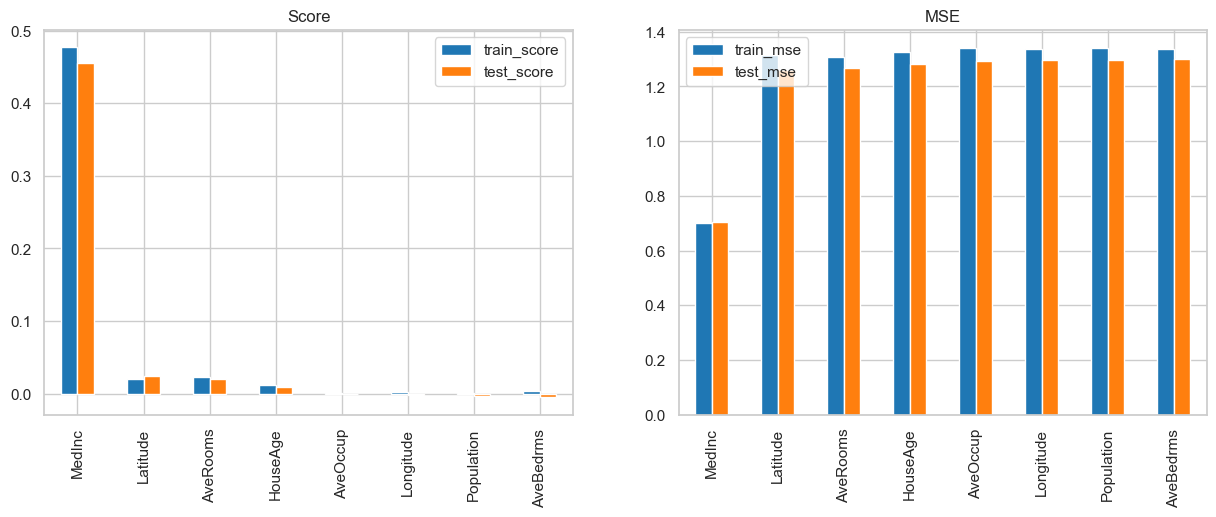

In [159]:
# Visualise train and test scores
f = plt.figure(figsize=(15,5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

df_scores[["train_score", "test_score"]].plot(kind="bar", ax=ax1, title='Score')
df_scores[["train_mse", "test_mse"]].plot(kind="bar", ax=ax2, title='MSE')

### Ajustando un modelo lineal múltiple
También es posible ajustar un modelo lineal múltiple, utilizando todas las variables:

In [223]:
X_train

array([[   2.375     ,   41.        ,    3.72289157, ...,    1.8       ,
          32.76      , -117.13      ],
       [   6.1092    ,   20.        ,    6.81617647, ...,    3.04411765,
          33.71      , -117.95      ],
       [   3.775     ,   47.        ,    5.41911765, ...,    2.72058824,
          37.7       , -122.47      ],
       ...,
       [   3.1912    ,   20.        ,    3.89473684, ...,    2.16646267,
          33.73      , -117.99      ],
       [   3.1755    ,   15.        ,    5.33257919, ...,    2.51131222,
          35.65      , -117.74      ],
       [   5.7951    ,   24.        ,    6.63575042, ...,    3.22428331,
          33.89      , -117.84      ]])

In [163]:
# Create the Linear Regression estimator
lm = LinearRegression()

# Perform the fitting
lm.fit(X_train, y_train)

# Print coefs
print(lm.intercept_, lm.coef_)


-36.629303212633246 [ 4.40891333e-01  9.18181009e-03 -1.14542417e-01  6.22816617e-01
 -8.95419955e-06 -3.43996011e-03 -4.16329071e-01 -4.30944775e-01]


In [165]:
# Compute Score for training and testing sets 
train_score = lm.score(X_train, y_train)
test_score = lm.score(X_test, y_test)

print(train_score, test_score)

# Compute MSE for training and testing sets 
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

mse_train = np.mean((y_train_pred - y_train)**2)
mse_test = np.mean((y_test_pred - y_test)**2)
print(mse_train, mse_test)

0.6092688230346823 0.5904434534503675
0.5238992592691052 0.5295541883274836


#### Volvemos a hacerlo con statmodels para obtener mas detalles

In [238]:
X_train_df = pd.DataFrame(X_train, columns=housing.feature_names)
X_test_df = pd.DataFrame(X_test, columns=housing.feature_names)
X_train_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.3750,41.0,3.722892,1.012048,747.0,1.800000,32.76,-117.13
1,6.1092,20.0,6.816176,0.997549,1242.0,3.044118,33.71,-117.95
2,3.7750,47.0,5.419118,0.926471,370.0,2.720588,37.70,-122.47
3,3.3654,23.0,6.375000,1.335648,887.0,2.053241,39.31,-123.81
4,4.8295,10.0,5.938998,1.013072,1773.0,3.862745,34.44,-118.13
...,...,...,...,...,...,...,...,...
16507,5.7765,36.0,5.791444,1.000000,522.0,2.791444,33.82,-118.36
16508,6.4350,40.0,4.361039,0.966234,719.0,1.867532,33.87,-118.40
16509,3.1912,20.0,3.894737,1.082007,1770.0,2.166463,33.73,-117.99
16510,3.1755,15.0,5.332579,1.095023,1110.0,2.511312,35.65,-117.74


In [229]:
X_train_sm = sm.add_constant(X_train_df)
est = sm.OLS(y_train, X_train_sm) # Creates an object OLS estimator
est = est.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     3217.
Date:                Wed, 30 Oct 2024   Prob (F-statistic):               0.00
Time:                        11:29:25   Log-Likelihood:                -18092.
No. Observations:               16512   AIC:                         3.620e+04
Df Residuals:                   16503   BIC:                         3.627e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.6293      0.741    -49.453      0.000     -38.081     -35.177
MedInc         0.4409      0.005     92.711      0.000       0.432       0.450
HouseAge       0.0092      0.000     18.437      0.000       0.008       0.010
AveRooms      -0.1145      0.007    -16.943      0.000      -0.128      -0.101
AveBedrms      0.6228      0.031     20.205      0.000       0.562       0.683
Population -8.954e-06   5.22e-06     -1.714      0.087   -1.92e-05    1.29e-06
AveOccup      -0.0034      0.000     -7.049      0.000      -0.004      -0.002
Latitude      -0.4163      0.008    -51.352      0.000      -0.432      -0.400
Longitude     -0.4309      0.008    -50.869      0.000      -0.448      -0.414
==============================================================================
Omnibus:                     3477.419   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10121.727
Skew:                           1.103   Prob(JB):                         0.00
Kurtosis:                       6.138   Cond. No.                     2.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [242]:
# Realizamos predicciones sobre los datos de prueba
X_test_sm = sm.add_constant(X_test_df)
y_pred = est.predict(X_test_sm)

# Evaluamos la performance del modelo con RMSE y R^2
from sklearn.metrics import mean_squared_error, r2_score

rmse = mean_squared_error(y_test, y_pred, squared=False)  # Raíz del error cuadrático medio
r2 = r2_score(y_test, y_pred)  # R^2

print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

RMSE: 0.7277047398000672
R^2: 0.5904434534503675


**EJERCICIO 1: Cambio Climático y Extensión del Hielo Marino**<p>

Queremos responder a la pregunta: ¿Ha habido una disminución en la cantidad de hielo en los últimos años?

Para ello utilizaremos las mediciones de la extensión del hielo marino del [Centro Nacional de Datos de Nieve y Hielo](https://nsidc.org).

Realizaremos los siguientes pasos de procesamiento:

- Debemos leer y limpiar los datos.
- Para calcular la tendencia en un intervalo de tiempo dado (mes), necesitamos normalizar los datos.
- Estos valores pueden ser graficados para toda la serie temporal o para meses específicos.
- Podemos calcular la tendencia como una regresión lineal simple (OLS) y evaluarla cuantitativamente.
- También podemos estimar el valor de la extensión para 2025.

In [73]:
# Load the data and show the info and contents:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import Normalizer
from datetime import datetime

ice = pd.read_csv('C:/Users/carla/Downloads/Iron Hack  - Curso/Sesion 41/SeaIce.txt', delim_whitespace=True)
print('shape: {}'.format(ice.shape))
print(ice.head())
print(ice.info())
ice.describe()

ice['extent'] = ice['extent'].apply(lambda x: np.nan if x<0 else x)
ice['area'] = ice['area'].apply(lambda x: np.nan if x<0 else x)
print(ice.describe())

ice.dropna(subset=['extent','area'],inplace=True)
print(ice.describe())

#para OlS
ice['anodecimal'] = ice['year']+(ice['mo']-1)/12
x = ice[['area']]
y= ice['extent']

X = sm.add_constant(x)
est = sm.OLS(y, X).fit()
print(est.summary())

shape: (424, 6)
   year  mo data_type region  extent   area
0  1979   1   Goddard      N   15.54  12.33
1  1980   1   Goddard      N   14.96  11.85
2  1981   1   Goddard      N   15.03  11.82
3  1982   1   Goddard      N   15.26  12.11
4  1983   1   Goddard      N   15.10  11.92
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       424 non-null    int64  
 1   mo         424 non-null    int64  
 2   data_type  424 non-null    object 
 3   region     424 non-null    object 
 4   extent     424 non-null    float64
 5   area       424 non-null    float64
dtypes: float64(2), int64(2), object(2)
memory usage: 20.0+ KB
None
              year          mo      extent        area
count   424.000000  424.000000  422.000000  422.000000
mean   1996.000000    6.500000   11.777583    9.287796
std      10.214716    3.474323    3.120722    3.180044
min    1

C:\Users\carla\AppData\Local\Temp\ipykernel_39536\120852264.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  ice = pd.read_csv('C:/Users/carla/Downloads/Iron Hack  - Curso/Sesion 41/SeaIce.txt', delim_whitespace=True)


Para calcular la anomalía en un intervalo de tiempo dado, podemos calcular la media para ese intervalo de tiempo (usando el período de 1981 a 2010 para la extensión media), antes de la limpieza de datos.

In [ ]:
# para normalizar
from sklearn.preprocessing import Normalizer
transformer=Normalizer().fit(ice)
x_normalized=transformer.transform(ice)
print(x_normalized)

In [ ]:
est = sm.OLS(y_train, X_train) # Creates an object OLS estimator
est = est.fit()
est.summary()

## Visualización

### La importancia de graficar

El cuarteto de Anscombe comprende cuatro conjuntos de datos que tienen estadísticas descriptivas simples casi idénticas, pero tienen distribuciones muy diferentes y parecen muy diferentes cuando se grafican. Cada conjunto de datos consiste en once puntos (x, y). Fueron construidos en 1973 por el estadístico Francis Anscombe para demostrar tanto la importancia de graficar los datos antes de analizarlos como el efecto de los valores atípicos y otras observaciones influyentes en las propiedades estadísticas.

<center><img src="files/images/Anscombe's_quartet_3.svg"  width="600"></center>

Fuente [Wikipedia](https://en.wikipedia.org/wiki/Anscombe%27s_quartet).

### Ejemplo 1: Datos de Vivienda

Continuaremos con nuestro conjunto de datos de vivienda de Boston

In [ ]:
# Load datayou
from sklearn import datasets
boston = datasets.load_boston() # Dictionary-like object that exposes its keys as attributes.
df_boston = pd.DataFrame(boston.data, columns=boston.feature_names) # Create a DataFrame from the Boston dataset
df_boston['PRICE'] = boston.target
print('Shape of data: {}'.format(df_boston.shape))

In [167]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
X_housing,y_housing = housing.data, housing.target # Create X matrix and y vector from the dataset.
print('Shape of data: {} {}'.format(X_housing.shape, y_housing.shape))

Shape of data: (20640, 8) (20640,)


In [173]:
df_boston = pd.DataFrame(housing.data, columns=housing.feature_names) 
df_boston['PRICE'] = housing.target

In [177]:
df_boston

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


### Histograms

Text(0, 0.5, 'count')

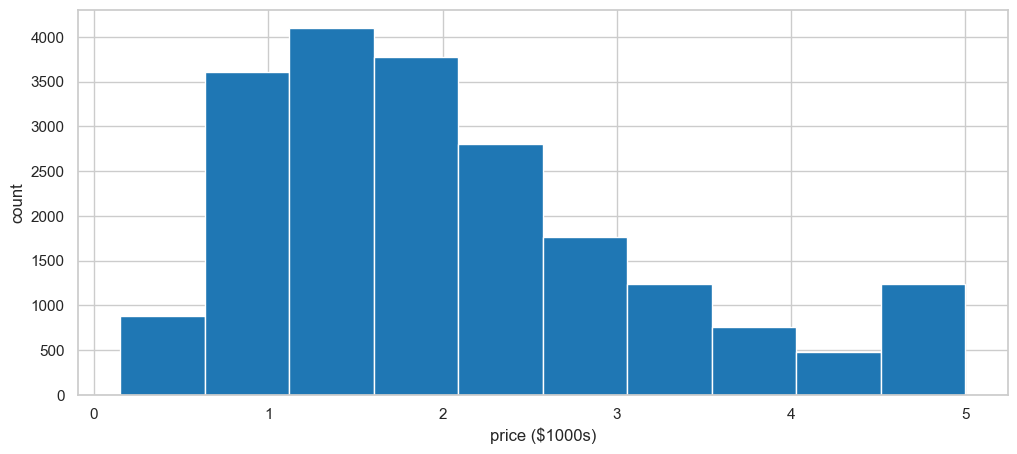

In [175]:
# Histogram of prices:
plt.hist(df_boston.PRICE) 
plt.xlabel('price ($1000s)')
plt.ylabel('count')

### Visualización de Regresión Lineal: Seaborn lmplot

La función ``lmplot()`` del módulo Seaborn está diseñada para explorar relaciones lineales de diferentes formas en conjuntos de datos multidimensionales. Los datos de entrada deben estar en un ``DataFrame`` de Pandas. Para graficar, proporciona los nombres de las variables predictoras y de respuesta junto con el conjunto de datos.

Primero consideramos la tarea de predecir los valores medianos de las casas en el área de Boston usando como predictor uno de los atributos, por ejemplo, LSTAT, definido como "la proporción de estatus más bajo de la población".
La visualización de Seaborn se puede usar para mostrar estas relaciones lineales fácilmente:

Usaremos la variable precio como nuestra respuesta $\textbf{y}$ y LSTAT como nuestro predictor $\textbf{x}$.

/Users/sabi/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


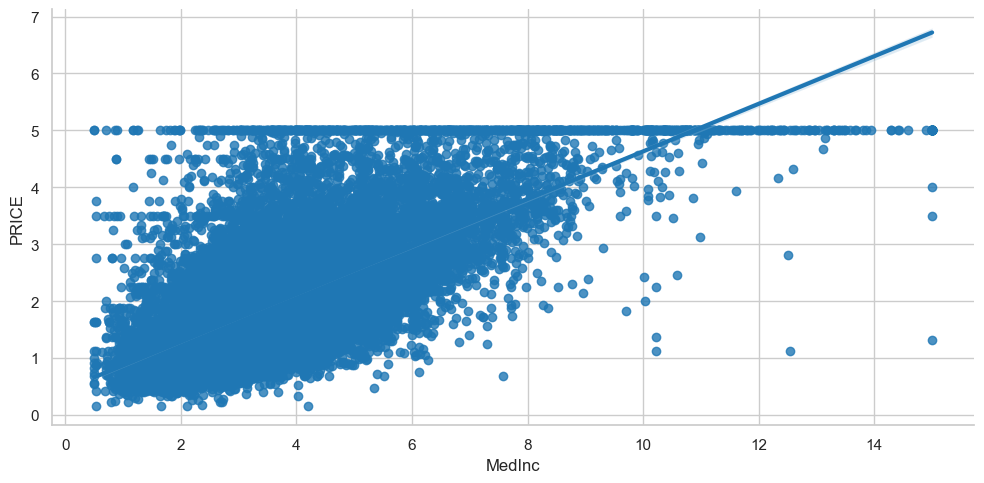

In [179]:
# Visualization of the relations between price and LSTAT
sns.lmplot(x="MedInc", y="PRICE", data=df_boston, aspect=2);

lmplot tiene dos componentes principales.

+ El primero es un diagrama de dispersión, que muestra los puntos de datos observados.
+ El segundo es una línea de regresión, que muestra el modelo lineal estimado que relaciona las dos variables. Debido a que la línea de regresión es solo una estimación, se traza con una banda de confianza del 95% para dar una impresión de la certeza en el modelo (usando Bootstraping).

¿Es la relación entre el precio de la casa y ``lstat`` no lineal? ¿Es la línea recta un ajuste pobre? Quizás se pueda obtener un mejor ajuste incluyendo términos de orden superior:

/Users/sabi/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


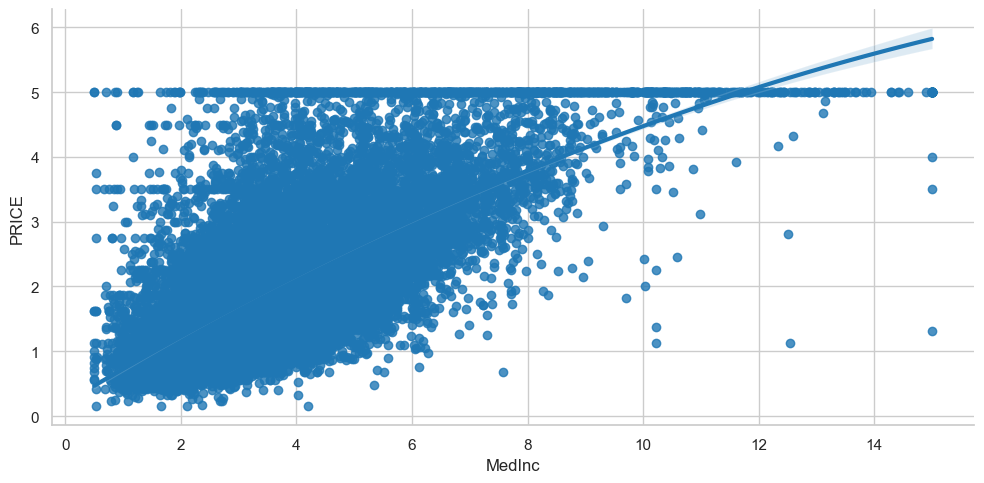

In [181]:
# Estimate a polynomial regression of order 2
sns.lmplot(x="MedInc", y="PRICE", data=df_boston, aspect=2, order=2);

/Users/sabi/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


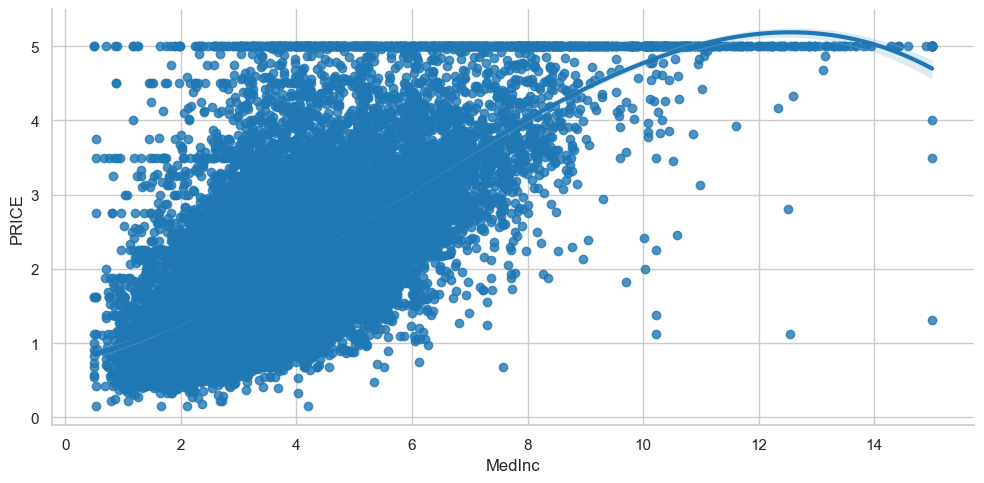

In [182]:
# Estimate a polynomial regression of order 3
sns.lmplot(x="MedInc", y="PRICE", data=df_boston, aspect=2, order=3);


In [185]:
df_boston

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


¿Qué pasaría si consideramos la variable RM o AGE?

/Users/sabi/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


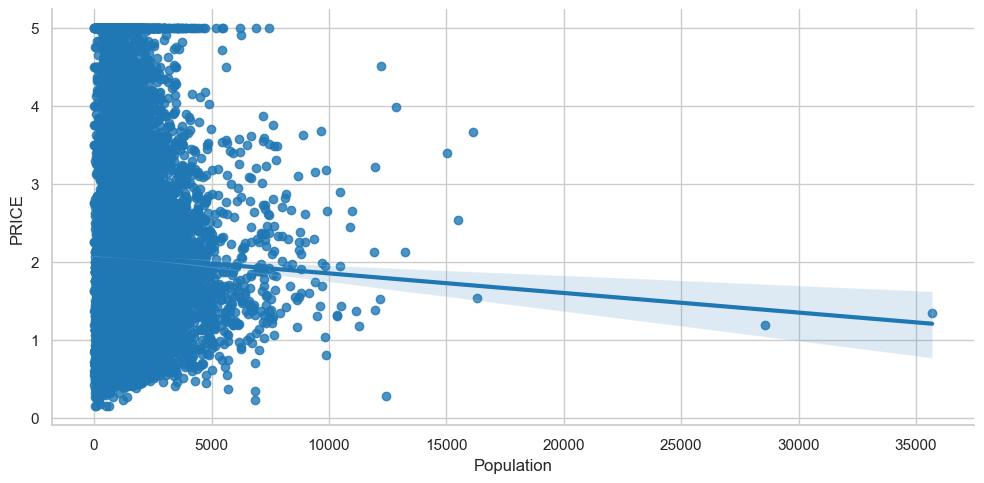

In [187]:
# Visualization of the relations between price and "average number of rooms per dwelling"
sns.lmplot(x="Population", y="PRICE", data=df_boston, aspect=2);

/Users/sabi/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


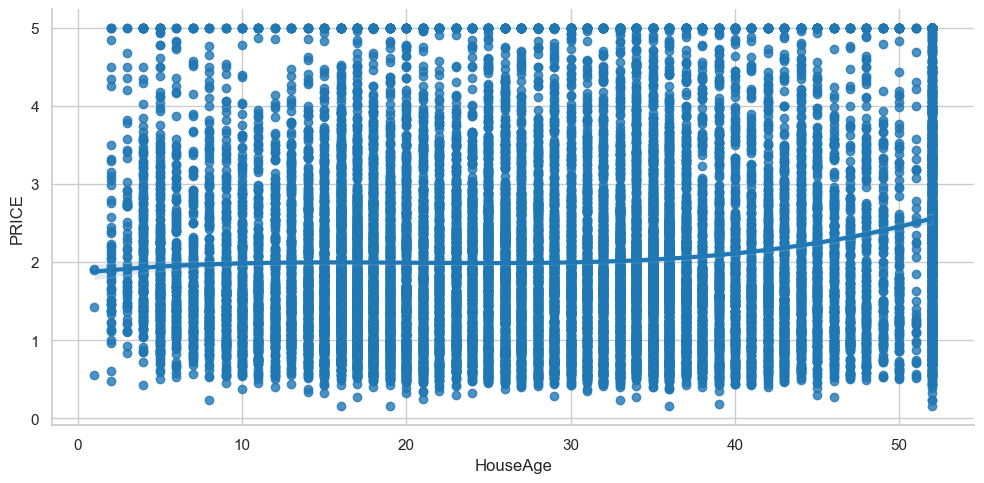

In [189]:
# Visualization of the relations between price and "proportion of owner-occupied units built prior to 1940"
sns.lmplot(x="HouseAge", y="PRICE", data=df_boston, aspect=2, order=3);

/Users/sabi/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


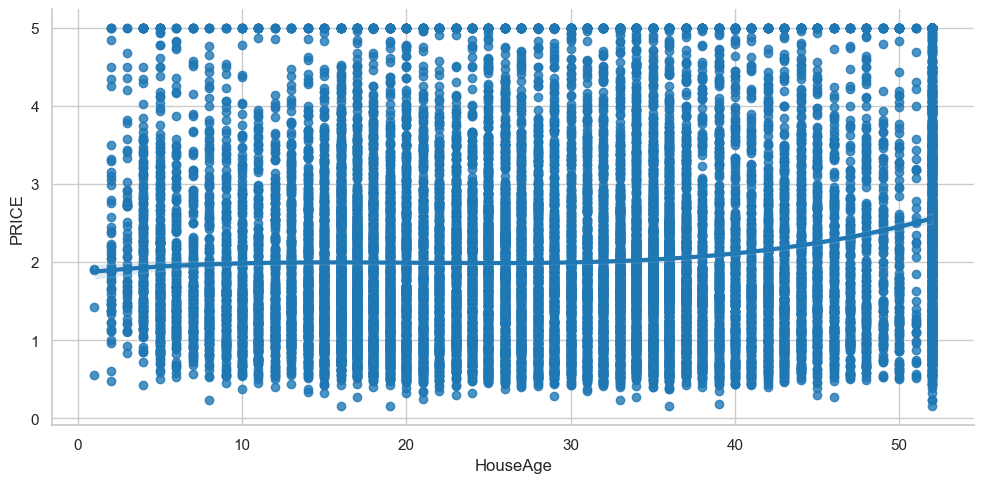

In [190]:
# Visualization of the relations between price and "proportion of owner-occupied units built prior to 1940"
sns.lmplot(x="HouseAge", y="PRICE", data=df_boston, aspect=2, order=3);